In [ ]:
#pip install pandas

In [ ]:
#pip install matplotlib

In [ ]:
#pip install kagglehub

In [ ]:
#pip install seaborn

In [ ]:
#pip install scikit-learn

In [ ]:
#pip install nbstripout


In [40]:
#data eda/visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data modeling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#for github
import nbstripout

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("willianoliveiragibin/customer-churn")

print("Path to dataset files:", path)

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\lucas\.cache\kagglehub\datasets\willianoliveiragibin\customer-churn\versions\1


EDA (Exploratory Data Analysis)

In [2]:
data = pd.read_csv('Customer Churn new.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0


The below indicates that we do not have customers with multiple rows. Each customer is unique to its own singular row of data.

In [4]:
data.CustomerId.nunique()

10000

In [5]:
data.RowNumber.nunique()

10000

Statistics

In [6]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  EstimatedSalary        Exited  
count   10000.000000     10000.000000  10000.000000  
mean    76485.889288    100090.239881      0.203700  
std     62397.405202     57510.492818      0.402769  
min         0.000000        11.580000      0.000000  
25%         0.000000     51

Statistical narrative:

Looking across our various quantitative columns, it appears to me that we have a evan spread of information. Starting with credit score, we see that our lowest value is 350 and highest is 850. This means the data properly represents a good spread of financially healthy individuals. Our age gap is great as we may be able to mix in Knearest Neighbors which are classification models. The tenure range is only 0 to 10 which may need to researched more. A gap of 10 days vs 10 years vastly changes the way we would think about the predictions. The balance represents the amount of money in the customers bank account, which again, we seem to have a healthy gap. Lastly, our estimated salary which I hypothesize to be our leading prediction indicator has an interesting minimum value of 11. I assume this is an error as making 11$ a year is not feasible, however the 25%, 50%, and 75% values seem to be in line with a typical yearly salary.  

Independant Variables (x values)

In [10]:
data_x = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
data_x.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,844,18,2,160980.03,145936.28
1,656,18,10,151762.74,127014.32
2,570,18,4,82767.42,71811.90
3,716,18,3,128743.80,197322.13
4,727,18,4,133550.67,46941.41


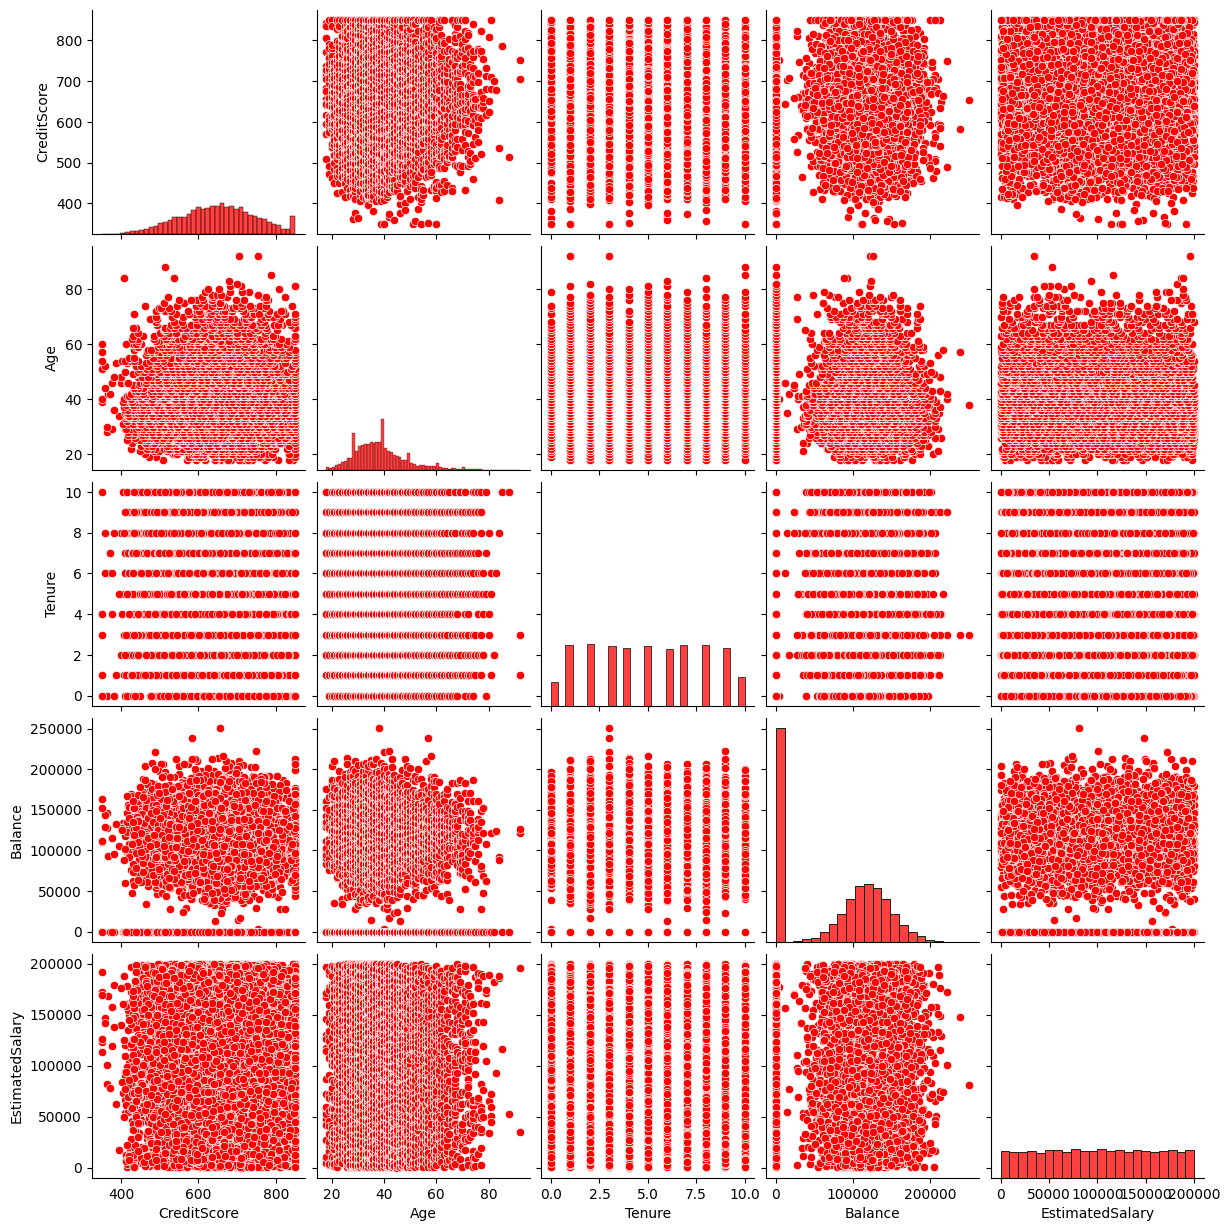

In [13]:
sns.pairplot(data_x, markers='o', diag_kind='hist', plot_kws={'color': 'red'}, diag_kws={'color': 'red'})

Further analysis needed**

After reviewing the pairplt, we do not see any clear linear relationships, howeever we also do not see any drastic outliers. 

#note to self:

May need to do more EDA on this dataset. Do a couple of graphs such as a heatmap, or grouping our salary, balance or age data.

Idea: graph the salary and balance by age to see if there is a relationship.

    Graph the amount of people by age and gender and geography to see if there is a relationship or trends.

Data Cleaning

In [48]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [52]:
#checking our different options (for automation we can code to have it find all the options and assign a number if needed)
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [53]:
data['Geography'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [54]:
#for modeling we usually only want to use numeric, meaning our string type values will have to be mapped to numeric (example: Male 0, Female 1)

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Geography'] = data['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 2})



In [59]:
#Percentage of customers who exited and didn't 

exited_percentage = data['Exited'].value_counts(normalize=True)
print(exited_percentage)



Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


From this we can keep in mind that about 80% of our dataset has not churned (or stayed a customer) and 20% 

Normalization

This is a technique used to change the values of numeric columns in the dataset to a common scale, without distorting the differences in the ranges of values. This makes it easier for our model to understand the data and improve the accuracy of our predictions. Also, it is good practice to do this so that you don't have one variable dominating the other.





StandardScaler will subtracting the mean of the data by the data point and then divided that value by the deviation. This will give us negative values. 

In [24]:
scaler = StandardScaler()
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df_normalized = scaler.fit_transform(data[numeric_columns])

In [27]:
# Convert normalized array to DataFrame with column names
df_normalized = pd.DataFrame(df_normalized, 
                           columns=numeric_columns, 
                           index=data.index)

In [28]:
df_normalized.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,2.001803,-1.994969,-1.041760,1.354197,0.797217
1,0.056609,-1.994969,1.724464,1.206470,0.468183
2,-0.833213,-1.994969,-0.350204,0.100675,-0.491732
3,0.677416,-1.994969,-0.695982,0.837543,1.690765
4,0.791230,-1.994969,-0.350204,0.914583,-0.924205


In [29]:
df_normalized.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.863665e-16,1.818989e-16,-1.129763e-16,-5.968559e-17,-2.344791e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-1.740268e+00
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-8.535935e-01
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,1.802807e-03
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.572431e-01
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,1.737200e+00


Another method of normalization is by using MinMaxScaler

In [31]:

scaler = MinMaxScaler()
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df_normalized = scaler.fit_transform(data[numeric_columns])

In [32]:
df_normalized_2 = pd.DataFrame(df_normalized, 
                           columns=numeric_columns, 
                           index=data.index)
df_normalized_2.head()


,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,0.988,0.0,0.2,0.641615,0.729693
1,0.612,0.0,1.0,0.604878,0.635074
2,0.440,0.0,0.4,0.329885,0.359036
3,0.732,0.0,0.3,0.513132,0.986647
4,0.754,0.0,0.4,0.532291,0.234672


In [33]:
df_normalized_2.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,0.500441
std,0.193307,0.141727,0.289217,0.248696,0.287580
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,0.254977
50%,0.604000,0.256757,0.500000,0.387402,0.500960
75%,0.736000,0.351351,0.700000,0.508749,0.746955
max,1.000000,1.000000,1.000000,1.000000,1.000000


The MinMaxScaler did as expected which was making it so each data point was mapped to a value between 0 and 1 to represent where the value lies within the minimum and maximum value of the column.

*** I will continue with the MinMaxScaler option, but could do some A/B testing with the other normalized set to see if we gain or lose performance.

Modeling

In [55]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,0,0,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,0,0,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,0,1,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,2,1,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,0,0,18,4,133550.67,46941.41,0


In [56]:
#Add normalized data to our other indicators while also splitting out the training and test variables:
extra_variables = ['CustomerId', 'Surname', 'Geography', 'Gender'] #keep in mind that customerid and surname should be unique
model_x_extra = ['CustomerId', 'Gender', 'Geography']
X_data = pd.concat([df_normalized_2, data[model_x_extra]], axis=1)
y_data = data['Exited']




In [57]:
#KNN, Logistic Regression, Decision Tree/random forests, XGBoost
#start with KNN
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=10)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7745

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1622
           1       0.21      0.07      0.11       378

    accuracy                           0.77      2000
   macro avg       0.51      0.50      0.49      2000
weighted avg       0.70      0.77      0.73      2000


Confusion Matrix:
[[1522  100]
 [ 351   27]]


Based on the statistics from the KNN, we can see that the model is statstically signficant based on the accuracy being over the 60-70% mark. 

*Relearn precision, recall, f1-score.

Our confusion matrix shows that we have 1522 true positives, 100 false positives, 351 false negatives, and 27 true negatives. Based on the TP rate we can see that it is correctly predicting positives 83% of the time which is very good. However, the true negatives was a bit lower than I would have expected. 
